<a href="https://colab.research.google.com/github/pablillo77/data_science_1/blob/main/Proyecto_ParteIII_Gimenez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

---

**Título: Exploración del dataset de Kaggle sobre Diabetes, basado en "Determinants of Gestational Diabetes Pedigree Function for Pima Indian Females" para comprender la distribución y relaciones en un conjunto de datos multidimensional e intentar predecir el desarrollo de la enfermedad**

**Resumen:**
Este estudio presenta una exploración de un dataset multidimensional basado en información del National Institute of Diabetes and Digestive and Kidney Diseases.El objetivo es comprender su estructura, distribución y posibles relaciones entre variables y explorar su posible utilidad en la predicción del desarrollo de la enfermedad. Se utilizó un enfoque de análisis descriptivo y visualización de datos para examinar un conjunto de datos compuesto por información de parámetros que pueden incidir o no en el desarrollo de Diabetes, una funcion de scoring y un Outcome (Diabetes/No diabetes). Inicialmente, se realizó una exploración de la estructura del dataset, revelando un total de 768 observaciones y 9 variables. Luego, se calcularon estadísticas descriptivas para cada variable, proporcionando información sobre la media, mediana, desviación estándar y valores extremos.

Además, se llevaron a cabo visualizaciones univariadas y multivariadas para explorar la distribución de variables individuales y las relaciones entre pares de variables. Se identificaron [número de valores atípicos] valores atípicos en el dataset, los cuales serán objeto de un análisis más detallado en investigaciones posteriores. Se observaron también relaciones significativas entre ciertas variables, como se evidenció en la matriz de correlación y en las visualizaciones de datos multivariados.

En conjunto, estos resultados preliminares proporcionan una comprensión inicial de la estructura y la naturaleza de los datos, lo que servirá como base para análisis más avanzados y la construcción de modelos predictivos en investigaciones futuras.

---

Este abstract ofrece una visión general de los pasos y resultados clave obtenidos durante la exploración preliminar del dataset, lo que permite a los lectores comprender rápidamente la naturaleza y el alcance del estudio.

Fuente: https://github.com/pablillo77/data_science_1/blob/main/Determinants-of-Gestational-Diabetes-Pedigree-Function-for-Pima-Indian-Females-IMOJ-6-121.pdf

# Importamos las librerias que utilizaremos

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [2]:
mpl.style.use('ggplot')

In [3]:
url = 'https://raw.githubusercontent.com/pablillo77/data_science_1/main/diabetes.csv?token=GHSAT0AAAAAACQE62MIG6B5QH4AC6SJPM6CZQDEJOQ'
df = pd.read_csv(url) #importo el dataset en formato csv desde mi github pasandole la url la método .read_csv()


# A continuación se agregan las definiciones de los campos:
Pregnancies: Expresa la cantidad de embarazos

Glucose: Nivel de glucosa en sangre en ayunas en mg/dl

BloodPressure: Presión diastólica en mmHg

SkinThickness: Espesor de la piel en el ticeps en mm

Insulin: Nivel de insulina en sangre en uU/ml

BMI: Indice de masa corporal, es la altura dividida el peso elevado al cuadrado. La altura expresada en metros y el peso en kg.

DiabetesPedigreeFunction: Parametro que expresa la probabilidad de un individuo de desarrollar diabetes, basado en su edad e historia familiar. Varía entre 0,08 y 2,42
Age: Edad

Outcome: Para expresar el resultado final 1: diabetes 0: sin diabetes

## Preguntas e hipótesis inciales
* 1) Estudiar la relación entre las variables, por ejemplo entre Insulina y
Glucosa. La insulina es la hormona que permite que la glucosa en sangre entre a las células, cuando la persona presenta glucemia elevada de manera anormal, valores anormalmente altos de insulina en ayunas (>25 uU/ml) pueden indicar resistencia a la insulina y aumenta las chances de desarrollar diabetes de tipo 2. Si la glucemia es elevada pero la insulina no, puede ser una indicación de qu el páncreas ya no alcanza a compensarlo y se puede desarrollar diabetes de tipo 1.

* 2) Investigar y ampliar correlaciones con las otras variables del dataset. El indice de masa corporal BMI, suele ser un predictor de sindrome metabólico y puede aumentar las chances de desarrollar diabetes.

* 3) Investigar  si se encuentran correlaciones fuertes entre las variables, si existe redundancia y si es factible aplicar algún método para reducir la dimensionalidad del dataset como PCA y quedarnos con combinaciones que expresen la maxima variabilidad de los datos.

* 4) Separar en grupos de características similares si es que existen para entender hay distintos "grados" de enfermedad en la muestra del dataset. Cuestionar y evaluar la utilidad de la DPF (función de pedigree de diabetes)

#Estructura y resumen estadístico

In [4]:
print("Las columnas del dataset son: ")
df.columns

Las columnas del dataset son: 


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print("Las dimensiones del dataset son: ")
df.shape


Las dimensiones del dataset son: 


(768, 9)

## Análisis de datos faltantes. Se evidencian valores en 0 que son físicamente incorrectos en las variables, Glucose, BloodPressure, SkinThickness, Insulin y BMI. Se procede a reemplazarlos por NaN para su posterior análisis.

In [7]:
df_nan = df.copy(deep=True) #creo una copia para mantener el original
df_nan[["Glucose",	"BloodPressure", "SkinThickness", "Insulin",	"BMI"]] = \
df_nan[["Glucose",	"BloodPressure", "SkinThickness", "Insulin",	"BMI"]].replace(to_replace=0, value=np.nan) #utilizo el método replace para cambiar los ceros por nan



In [8]:
print(df_nan.isna().sum()) #valores con su conteo de NaNs

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [10]:
# Calcular el coeficiente de variación (CV) para las variables
# Está constituido por el desvio estándar dividido por la media multiplicado por 100 para hacerlo porcentual, nos da una idea de si la media es representativa del conjunto de datos o no.
# CV < 30 % los datos son homogéneos y la media es representativa
coef_var = (df_nan["Glucose"].std() / df_nan['Glucose'].mean() *100).round(2)
print("El coeficiente de variación para la glucosa es:\n",coef_var)
coef_var = (df_nan["Insulin"].std() / df_nan['Insulin'].mean() *100).round(2)
print("El coeficiente de variación para la insulina es:\n",coef_var)
coef_var = (df_nan["SkinThickness"].std() / df_nan['SkinThickness'].mean() *100).round(2)
print("El coeficiente de variación para la SkinThickness es:\n",coef_var)
coef_var = (df_nan["BMI"].std() / df_nan['BMI'].mean() *100).round(2)
print("El coeficiente de variación para la BMI es:\n",coef_var)
coef_var = (df_nan["BloodPressure"].std() / df_nan['BloodPressure'].mean() *100).round(2)
print("El coeficiente de variación para la BloodPressure es:\n",coef_var)

El coeficiente de variación para la glucosa es:
 25.09
El coeficiente de variación para la insulina es:
 76.36
El coeficiente de variación para la SkinThickness es:
 35.94
El coeficiente de variación para la BMI es:
 21.34
El coeficiente de variación para la BloodPressure es:
 17.1


## Entendemos que de los valores con datos faltantes, Glucose, BMI y BloodPressure presentan una distribución simétrica. Se utilizará entonces como estrategia, reemplazarlos por su media, ya que están muy por debajo del 15% de los datos totales. En cuanto a los valores de Insulin y SkinThickness, son variables de interés por lo cual en esta instancia es preferible descartar sus NaN para no distorsionar el análisis.

In [11]:
df_nan["Glucose"].fillna(df_nan["Glucose"].mean(), inplace=True) #reemplazo nos nan de "Glucose" por su media
df_nan["BloodPressure"].fillna(df_nan["BloodPressure"].mean(), inplace=True) #reemplazo los nan de "BloodPressuere" por su media
df_nan["BMI"].fillna(df_nan["BMI"].mean(), inplace=True) #reemplazo los nan de "BloodPressuere" por su media
print(df_nan.isna().sum()) #checkeo imprimiendo la suma de los nan como va quedando

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [12]:
df_nan=df_nan.dropna() #llamo df_nan al df sin nans
print(df_nan.isna().sum())
df_nan.shape #verifico que quedamos ahora con 394 filas

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


(394, 9)

## Reducción de la dimensionalidad utilizando el método de componentes principales

In [13]:
#Analisis de componentes principales
df_pca =  df_nan.copy(deep=True) #hago una copia del original en df_pca
df_pca.drop(columns=["Outcome"],inplace=True) # remuevo el Outcome (1= diabetico, 0= no diabetico)
df_pca.reset_index(inplace=True) #reseteo el indice
df_pca.drop(columns=["index"], inplace=True) #remuevo la columna index
df_pca

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59
...,...,...,...,...,...,...,...,...
389,0,181.0,88.0,44.0,510.0,43.3,0.222,26
390,1,128.0,88.0,39.0,110.0,36.5,1.057,37
391,2,88.0,58.0,26.0,16.0,28.4,0.766,22
392,10,101.0,76.0,48.0,180.0,32.9,0.171,63


In [14]:
# importamos el método que permite utilizar el análisis de componentes principales o PCA
from sklearn.decomposition import PCA
model_pca = PCA(n_components=4) # instancio el modelo con 4 componentes en principio
model_pca.fit(df_pca) # entreno el modelo

PCA(n_components=4)

0.9335155854026183


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC1,0.002392,0.155453,0.011041,0.016669,0.987350,0.013597,0.000388,0.019584
PC2,0.029264,0.966516,0.132185,0.065031,-0.157907,0.036060,0.001014,0.130587
PC3,0.063476,-0.186351,0.770228,0.456305,0.003358,0.280543,0.000659,0.284715
PC4,0.089556,-0.042605,0.427440,-0.736140,0.012440,-0.379001,-0.004622,0.348912


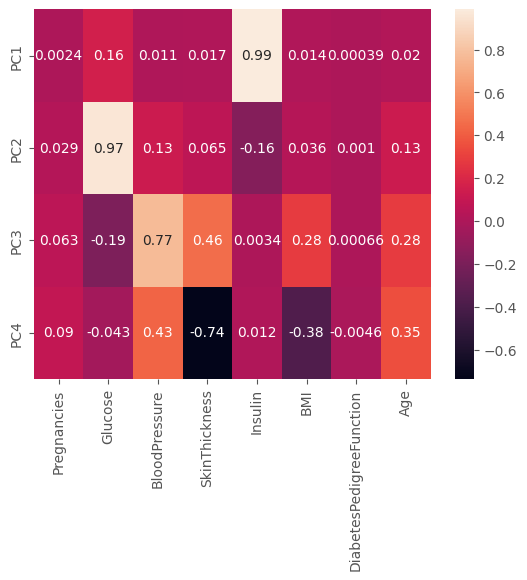

In [15]:
print(model_pca.explained_variance_ratio_[0]) #analizo que la primera componente principal, explica el 93% de la varianza!
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4']
componentes = pd.DataFrame(data=model_pca.components_, columns = df_pca.columns, index=lista_componentes)
ax = sns.heatmap(componentes, annot=True)
componentes

In [16]:
# Veamos la varianza explicada de cada componente
# para eso utilizamos .explained_variance_ratio_
print(lista_componentes)
print(model_pca.explained_variance_ratio_.round(2)*100)

['PC1', 'PC2', 'PC3', 'PC4']
[93.  4.  1.  1.]


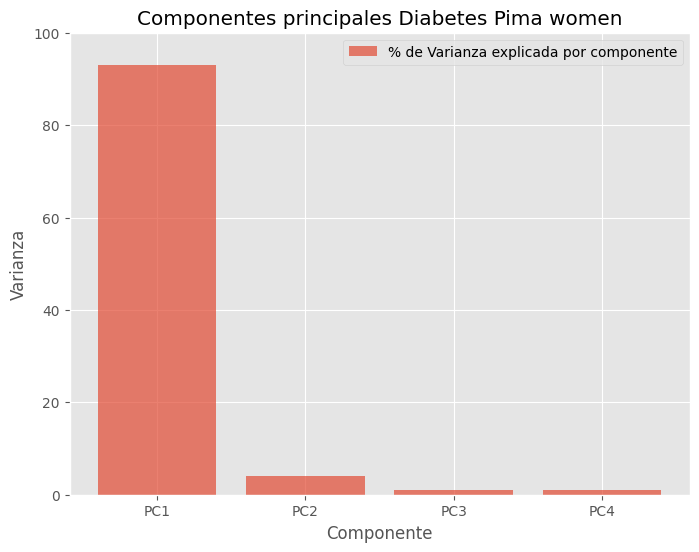

In [17]:
# Practiquemos con gráficos, nos ayudan a entender mejor la información
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(lista_componentes, model_pca.explained_variance_ratio_.round(2)*100, alpha=0.7, label='% de Varianza explicada por componente')
ax.set_title('Componentes principales Diabetes Pima women')
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza')
ax.set_ylim(0, 100)
ax.legend()

In [18]:
#genero las proyecciones calculando para cada instancia del dataset sus componentes principales y lo guardamos en un dataframe.
proyecciones = pd.DataFrame(model_pca.transform(df_pca), index=df_pca.index,columns=lista_componentes)

proyecciones.drop(columns=['PC3', 'PC4'], inplace=True) #La PC1 ya supera el umbral de 80% y explica un 93% de la varianza, me quedo con PC1 y PC2
proyecciones.reset_index(inplace=True) #reseteo el index, imprimo el dataframe
proyecciones.drop(columns=["index"], inplace=True)
print(proyecciones)

            PC1        PC2
0    -66.413543 -25.309659
1     14.462455   8.822396
2    -73.932092 -35.707465
3    394.768178  14.427985
4    692.324287 -43.162291
..          ...        ...
389  359.520974   3.366220
390  -43.615770  16.199722
391 -143.594344 -14.650575
392   21.800459 -18.422696
393  -43.440488   4.793543

[394 rows x 2 columns]


In [19]:
#Agrego la columna outcome al dataframe proyecciones     ################### revisar por aqui
# Agreguemos la columna de las especies para poderla utilizar más adelante
df_nan.reset_index(inplace=True) #reseteo el index, imprimo el dataframe
df_nan.drop(columns=["index"], inplace=True)
proyecciones['Outcome'] = df_nan['Outcome'] # Esto solo funciona por que tienen el mismo index
proyecciones


,PC1,PC2,Outcome
0,-66.413543,-25.309659,0
1,14.462455,8.822396,1
2,-73.932092,-35.707465,1
3,394.768178,14.427985,1
4,692.324287,-43.162291,1
...,...,...,...
389,359.520974,3.366220,1
390,-43.615770,16.199722,1
391,-143.594344,-14.650575,0
392,21.800459,-18.422696,0


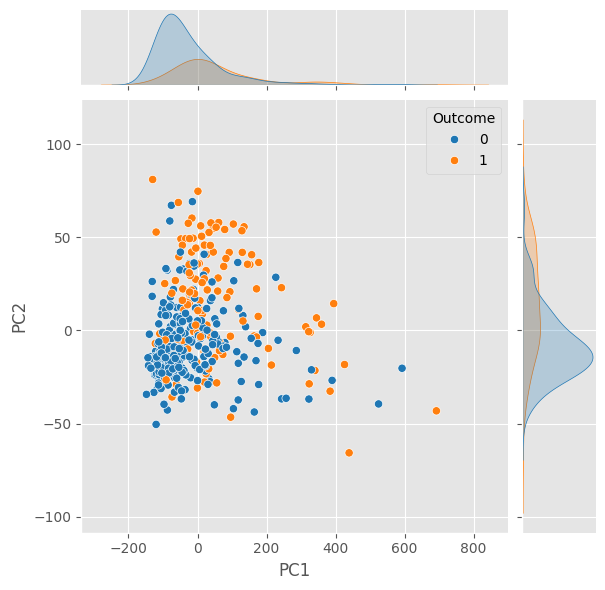

In [20]:
# Practiquemos con un gráfico de seaborn, así podremos ver la distribución y la relación entre las componentes 1 y 2
g = sns.jointplot(x='PC1', y='PC2', data=proyecciones, hue="Outcome", palette="tab10")
g.fig.set_figwidth(6)

#La función jointplot crea un gráfico en el que se muestra la distribución de los valores de dos variables en
#forma de histogramas, y también traza una gráfica de dispersión para mostrar la relación entre ambas variables.

In [21]:
proyecciones.Outcome.value_counts() #las clases estan desbalanceadas, no obstante estudiare el comportamiento de KNN

Outcome
0    264
1    130
Name: count, dtype: int64

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
proyecciones_features=proyecciones[["PC1", "PC2"]]
proyecciones_target=proyecciones[["Outcome"]]
print(proyecciones_features)
print( proyecciones_target)

            PC1        PC2
0    -66.413543 -25.309659
1     14.462455   8.822396
2    -73.932092 -35.707465
3    394.768178  14.427985
4    692.324287 -43.162291
..          ...        ...
389  359.520974   3.366220
390  -43.615770  16.199722
391 -143.594344 -14.650575
392   21.800459 -18.422696
393  -43.440488   4.793543

[394 rows x 2 columns]
     Outcome
0          0
1          1
2          1
3          1
4          1
..       ...
389        1
390        1
391        0
392        0
393        0

[394 rows x 1 columns]


In [24]:
# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(proyecciones_features,proyecciones_target,test_size=0.3, random_state=7)
# Creamos un KNN
modelo = KNeighborsClassifier(n_neighbors=3) #utilizo k=3 para "desempatar potencialemente ya que el resultado de Otcome es binario"
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [25]:
#comparo las metricas de los datos de enrenamiento y test
preds_train = modelo.predict(X_train)
preds_test = modelo.predict(X_test)
print(metrics.classification_report(y_test, preds_test))
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        79
           1       0.59      0.50      0.54        40

    accuracy                           0.71       119
   macro avg       0.68      0.66      0.67       119
weighted avg       0.71      0.71      0.71       119

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       185
           1       0.84      0.74      0.79        90

    accuracy                           0.87       275
   macro avg       0.86      0.84      0.85       275
weighted avg       0.87      0.87      0.87       275



In [26]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print('Logistic Regression Accuracy (test data):', accuracy_score(y_test, y_pred_lr))
y_pred_lr = model_lr.predict(X_train)
print('Logistic Regression Accuracy (train data):', accuracy_score(y_train, y_pred_lr))
y_pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy (test data): 0.7563025210084033
Logistic Regression Accuracy (train data): 0.7818181818181819
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        79
           1       0.70      0.47      0.57        40

    accuracy                           0.76       119
   macro avg       0.74      0.69      0.70       119
weighted avg       0.75      0.76      0.74       119



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
df_pca.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [32]:
X_train.columns

Index(['PC1', 'PC2'], dtype='object')

In [38]:
# Entrenamos un modelo de regresión logística
model_lr = LogisticRegression()
model_lr.fit(df_nan.drop('Outcome', axis=1), df_nan['Outcome'])

# Predecimos el resultado para un nuevo paciente
new_patient = pd.DataFrame({
    'Pregnancies': [1],
    'Glucose': [240],
    'BloodPressure': [100],
    'SkinThickness': [33],
    'Insulin': [60],
    'BMI': [31],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [46]
})

prediction = model_lr.predict(new_patient)

# Imprimimos el resultado de la predicción
if prediction[0] == 0:
    print('El paciente no tiene diabetes')
else:
    print('El paciente tiene diabetes')


El paciente tiene diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
#realizare un analis KNN-Means para estudiar clusterización posible de los datos, voy a quedarme con 3 variables, Glucose, Insulin, DiabetesPedigreeFunction
############################################################################################################################################################
df_KNN = df_nan.copy(deep=True)
df_KNN.reset_index(inplace=True)
df_KNN.drop(columns=["Pregnancies", "BloodPressure", "SkinThickness", "BMI","Age", "Outcome","index"], inplace=True)

df_KNN


,Glucose,Insulin,DiabetesPedigreeFunction
0,89.0,94.0,0.167
1,137.0,168.0,2.288
2,78.0,88.0,0.248
3,197.0,543.0,0.158
4,189.0,846.0,0.398
...,...,...,...
389,181.0,510.0,0.222
390,128.0,110.0,1.057
391,88.0,16.0,0.766
392,101.0,180.0,0.171


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

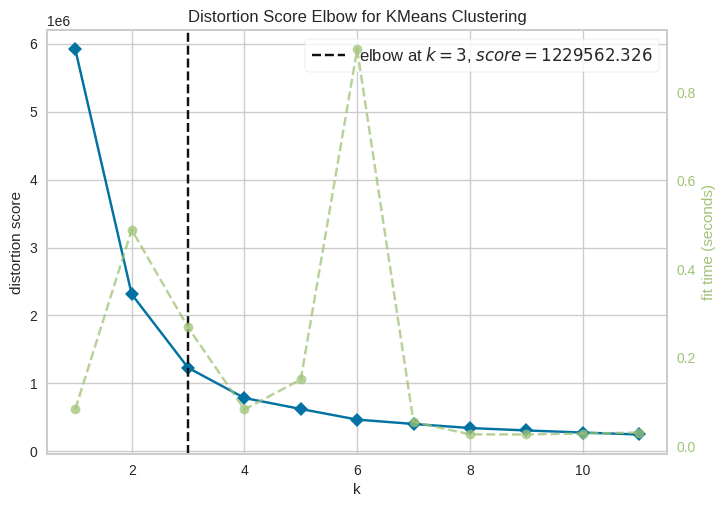

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_KNN)        # Entrenamos con los datos
visualizer.show()        # Renderizamos la imagen

In [ ]:
#Voy a estandarizar los datos con el standard scaler
# los datos deben ser estandarizados ya que al tener las variables de entrada de diferente naturaleza, puede generar ruido en la segmentación.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #genero una instancia del Scaler
df_KNN_scaled = scaler.fit_transform(df_KNN) #realizo el fit
df_KNN_scaled

array([[-1.09333323, -0.51884686, -1.02533958],
       [ 0.46794788,  0.10496753,  5.04016543],
       [-1.45112681, -0.5694264 , -0.79370078],
       ...,
       [-1.12585992, -1.17638095,  0.68764368],
       [-0.70301295,  0.20612662, -1.01390063],
       [-0.05247915, -0.36710822, -0.80227999]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

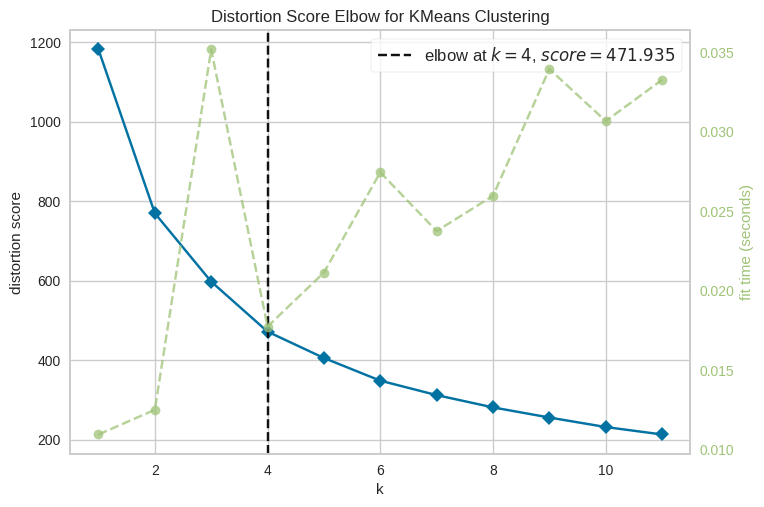

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_KNN_scaled)        # Entrenamos con los datos escalados para comparar
visualizer.show()

In [ ]:
# Crear y ajustar el modelo K-means
modelo = KMeans(n_clusters=5, max_iter=1000, init='random', random_state=27)
preds = modelo.fit_predict(df_KNN_scaled)
preds #preds es un array de una dimension

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 3, 1, 1, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 0, 2, 4, 4, 3, 3,
       3, 1, 1, 1, 0, 3, 4, 3, 4, 0, 4, 4, 0, 0, 3, 4, 4, 3, 4, 4, 3, 3,
       4, 3, 0, 4, 3, 3, 4, 1, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 4, 0, 3, 0,
       3, 3, 3, 4, 2, 4, 2, 1, 0, 0, 3, 4, 3, 4, 0, 3, 4, 0, 3, 4, 4, 0,
       3, 1, 2, 0, 4, 3, 4, 0, 0, 1, 3, 3, 1, 3, 4, 3, 4, 3, 4, 1, 4, 0,
       3, 2, 3, 1, 3, 3, 4, 3, 2, 4, 1, 1, 3, 0, 1, 2, 4, 0, 3, 3, 0, 3,
       0, 4, 4, 4, 1, 0, 3, 3, 3, 0, 2, 4, 4, 1, 4, 3, 4, 3, 3, 4, 4, 2,
       0, 0, 4, 0, 3, 3, 3, 4, 4, 4, 0, 3, 3, 3, 3, 4, 4, 4, 0, 3, 4, 3,
       3, 0, 3, 4, 1, 4, 3, 3, 4, 2, 2, 3, 3, 0, 1, 3, 3, 0, 0, 0, 0, 3,
       3, 4, 0, 3, 1, 3, 2, 0, 4, 4, 1, 0, 2, 4, 4, 1, 4, 4, 3, 3, 4, 1,
       4, 4, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 2, 4, 0, 0, 3, 3,
       0, 4, 0, 3, 3, 1, 3, 3, 4, 1, 2, 0, 0, 3, 4, 4, 3, 0, 4, 4, 0, 4,
       3, 4, 4, 1, 3, 3, 3, 3, 4, 0, 0, 0, 0, 0, 0, 4, 3, 3, 4, 2, 4, 4,
       0, 3, 3, 4, 1, 3, 3, 0, 3, 3, 4, 3, 3, 3, 1,

In [ ]:
print(df_KNN.isna().sum())
len(df_KNN_scaled)
print(preds.shape)
print(df_KNN.shape)
df_KNN


Glucose                     0
Insulin                     0
DiabetesPedigreeFunction    0
dtype: int64
(394,)
(394, 3)


,Glucose,Insulin,DiabetesPedigreeFunction
0,89.0,94.0,0.167
1,137.0,168.0,2.288
2,78.0,88.0,0.248
3,197.0,543.0,0.158
4,189.0,846.0,0.398
...,...,...,...
389,181.0,510.0,0.222
390,128.0,110.0,1.057
391,88.0,16.0,0.766
392,101.0,180.0,0.171


In [ ]:
#convierto preds en un dataframe y lo concateno con df_KNN
preds=pd.DataFrame(preds) #convierto a dataframe
df_concat=pd.concat([df_KNN, preds], axis=1)
#df_concat=df_concat.dropna()
#df_concat
#print(df_concat.isna().sum())
df_concat=df_concat.rename(columns = {0:'cluster'})
df_concat

,Glucose,Insulin,DiabetesPedigreeFunction,cluster
0,89.0,94.0,0.167,3
1,137.0,168.0,2.288,2
2,78.0,88.0,0.248,3
3,197.0,543.0,0.158,1
4,189.0,846.0,0.398,1
...,...,...,...,...
389,181.0,510.0,0.222,1
390,128.0,110.0,1.057,0
391,88.0,16.0,0.766,0
392,101.0,180.0,0.171,3


In [ ]:
# prompt: Add to the previous dataframe df_concat the column "Outcome" from df_nan (indexes should match)

df_concat = df_concat.join(df_nan['Outcome'], how='inner')


In [ ]:
df_concat.groupby(["cluster"])[["Glucose", "Insulin", "DiabetesPedigreeFunction", "Outcome"]].describe()

Glucose                                                             \
          count        mean        std    min     25%    50%    75%    max   
cluster                                                                      
0          69.0  103.666667  14.246431   74.0   95.00  102.0  113.0  129.0   
1          37.0  161.648649  22.874314  124.0  143.00  158.0  181.0  198.0   
2          24.0  145.791667  29.866339   82.0  125.25  145.5  173.0  197.0   
3         153.0   99.873770  15.052731   56.0   89.00  100.0  112.0  130.0   
4         111.0  147.711712  19.477907  114.0  133.00  144.0  161.5  196.0   

        Insulin              ... DiabetesPedigreeFunction        Outcome  \
          count        mean  ...                      75%    max   count   
cluster                      ...                                           
0          69.0  117.985507  ...                  0.91700  1.292    69.0   
1          37.0  425.837838  ...                  0.61900  1.072    37.0   
2          24.0  212.083333  ...                  1.62475  2.420    24.0   
3         153.0   91.071895  ...                  0.43000  0.583   153.0   
4         111.0  165.450450  ...                  0.59200  0.893   111.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
0        0.289855  0.457019  0.0  0.0  0.0  1.0  1.0  
1        0.648649  0.483978  0.0  0.0  1.0  1.0  1.0  
2        0.625000  0.494535  0.0  0.0  1.0  1.0  1.0  
3        0.091503  0.289270  0.0  0.0  0.0  0.0  1.0  
4        0.513514  0.502084  0.0  0.0  1.0  1.0  1.0  

[5 rows x 32 columns]

In [ ]:
cluster_0 = df_concat[df_concat.cluster.isin([0])]
cluster_1 = df_concat[df_concat.cluster.isin([1])]
cluster_2 = df_concat[df_concat.cluster.isin([2])]
cluster_3 = df_concat[df_concat.cluster.isin([3])]
#print(df_concat.groupby(["cluster"])[["Glucose", "Insulin", "DiabetesPedigreeFunction", "Outcome"]])
df_concat

,Glucose,Insulin,DiabetesPedigreeFunction,cluster,Outcome
0,89.0,94.0,0.167,3,0
1,137.0,168.0,2.288,2,1
2,78.0,88.0,0.248,3,1
3,197.0,543.0,0.158,1,1
4,189.0,846.0,0.398,1,1
...,...,...,...,...,...
389,181.0,510.0,0.222,1,1
390,128.0,110.0,1.057,0,1
391,88.0,16.0,0.766,0,0
392,101.0,180.0,0.171,3,0


In [ ]:
# prompt: I want to sample each for "cluster" value in df_concat diferent random instances and see the rest of the columns

import random

# Create a dictionary to store the sampled dataframes
sampled_dataframes = {}

# Loop through each cluster value
for cluster_value in df_concat['cluster'].unique():
  # Get the rows for the current cluster
  cluster_data = df_concat[df_concat['cluster'] == cluster_value]

  # Sample 10 random instances from the current cluster
  sampled_df = cluster_data.sample(n=10)

  # Add the sampled dataframe to the dictionary
  sampled_dataframes[cluster_value] = sampled_df

# Print the sampled dataframes
for cluster_value, sampled_df in sampled_dataframes.items():
  print(f"Cluster {cluster_value}:")
  print(sampled_df)
  print()


Cluster 3:
     Glucose  Insulin  DiabetesPedigreeFunction  cluster  Outcome
270     97.0     82.0                     0.299        3        0
198    119.0     50.0                     0.205        3        0
52      89.0     37.0                     0.192        3        0
383    109.0    116.0                     0.219        3        0
363    110.0    100.0                     0.118        3        0
287     88.0     44.0                     0.422        3        0
58     120.0    135.0                     0.452        3        0
216     94.0     76.0                     0.561        3        0
76      88.0     53.0                     0.229        3        0
230    104.0     64.0                     0.510        3        1

Cluster 2:
     Glucose  Insulin  DiabetesPedigreeFunction  cluster  Outcome
1      137.0    168.0                     2.288        2        1
236    148.0    237.0                     1.001        2        1
204    127.0    275.0                     1.600      

In [ ]:
# prompt: count the outcome values for each value of cluster in df_concat

df_concat.groupby('cluster')['Outcome'].value_counts()


cluster  Outcome
0        0           49
         1           20
1        1           24
         0           13
2        1           15
         0            9
3        0          139
         1           14
4        1           57
         0           54
Name: count, dtype: int64

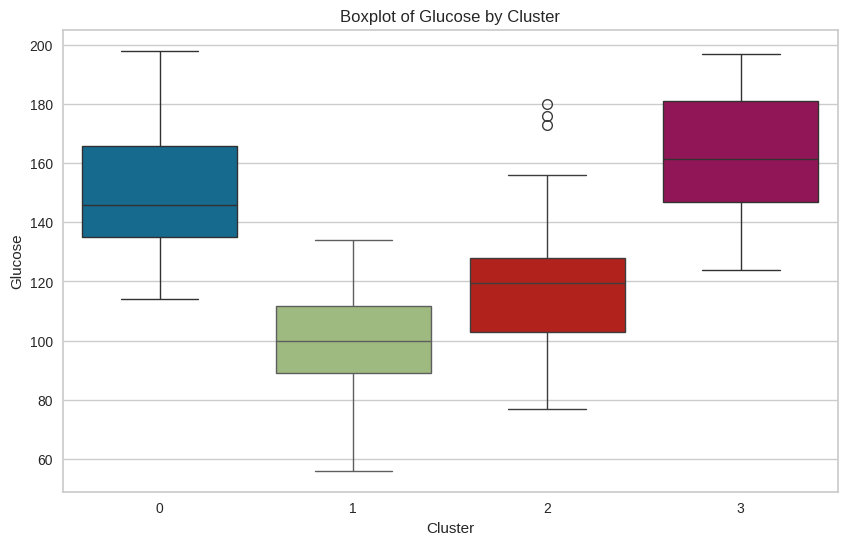

In [ ]:
# prompt: create a boxplot with seaborn showing in the same plot the dataframes cluster_0, cluster_1,cluster_2, cluster_3. Consider they have diferent sizes, the study variable in common is "Glucose" within each dataframe.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot for each cluster
sns.boxplot(x="cluster", y="Glucose", data=cluster_0, ax=ax)
sns.boxplot(x="cluster", y="Glucose", data=cluster_1, ax=ax)
sns.boxplot(x="cluster", y="Glucose", data=cluster_2, ax=ax)
sns.boxplot(x="cluster", y="Glucose", data=cluster_3, ax=ax)

# Set the title and labels
ax.set_title("Boxplot of Glucose by Cluster")
ax.set_xlabel("Cluster")
ax.set_ylabel("Glucose")

# Show the plot
plt.show()


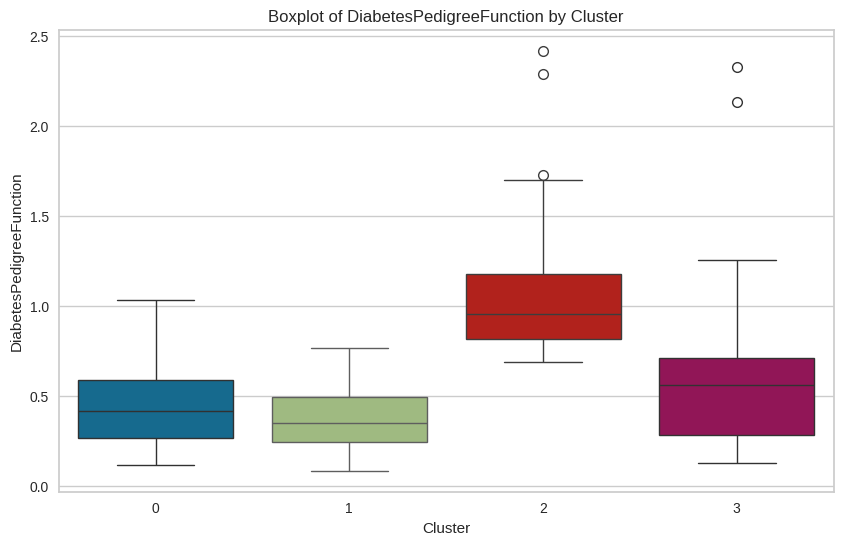

In [ ]:
# prompt: create a boxplot with seaborn showing in the same plot the dataframes cluster_0, cluster_1,cluster_2, cluster_3. Consider they have diferent sizes, the study variable in common is "DiabetesPedigreeFunction" within each dataframe.

import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot for each cluster
sns.boxplot(x="cluster", y="DiabetesPedigreeFunction", data=cluster_0, ax=ax)
sns.boxplot(x="cluster", y="DiabetesPedigreeFunction", data=cluster_1, ax=ax)
sns.boxplot(x="cluster", y="DiabetesPedigreeFunction", data=cluster_2, ax=ax)
sns.boxplot(x="cluster", y="DiabetesPedigreeFunction", data=cluster_3, ax=ax)

# Set the title and labels
ax.set_title("Boxplot of DiabetesPedigreeFunction by Cluster")
ax.set_xlabel("Cluster")
ax.set_ylabel("DiabetesPedigreeFunction")

# Show the plot
plt.show()


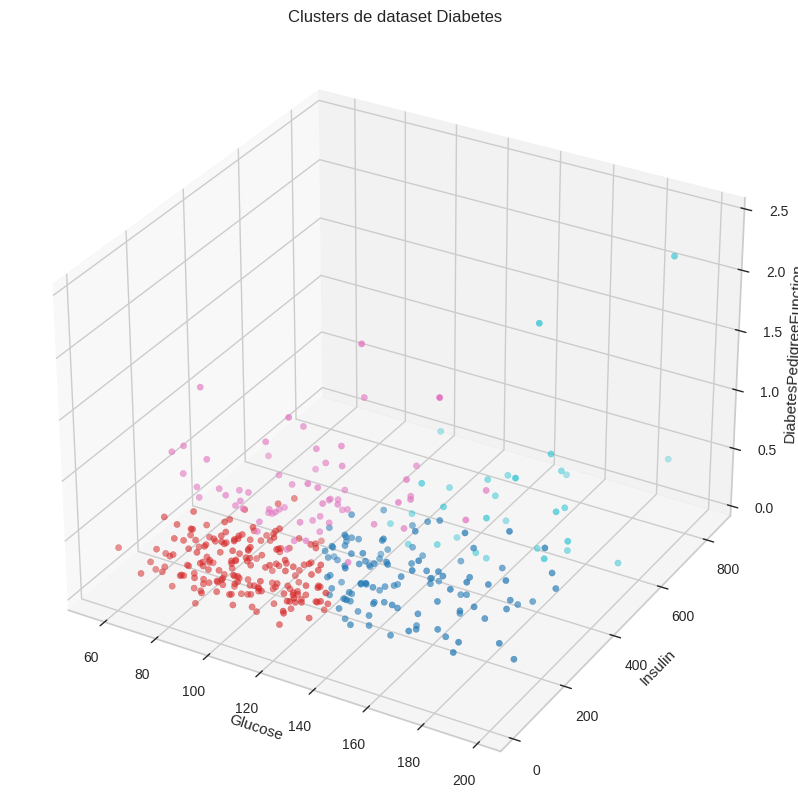

In [ ]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
ax.scatter3D(df_KNN["Glucose"], df_KNN["Insulin"], df_KNN["DiabetesPedigreeFunction"], c=preds, cmap="tab10")
plt.title("Clusters de dataset Diabetes")
ax.set_xlabel("Glucose")
ax.set_ylabel("Insulin")
ax.set_zlabel("DiabetesPedigreeFunction")
plt.show()

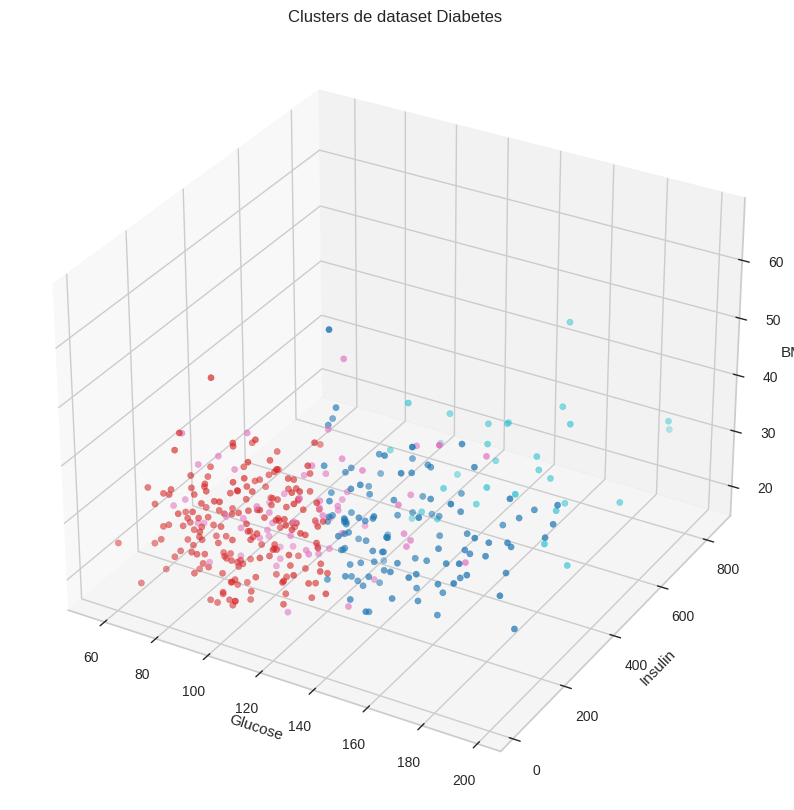

In [ ]:
# prompt: from dataframe df_nan, deep copy and produce another dataset called df_KNN_BMI keeping columns Glucose, Insulin and BMI. Produce a 3d plot like the previous snippet

import matplotlib.pyplot as plt
df_KNN_BMI = df_nan.copy(deep=True)
df_KNN_BMI.reset_index(inplace=True)
df_KNN_BMI.drop(columns=["Pregnancies", "BloodPressure", "SkinThickness", "DiabetesPedigreeFunction","Age", "Outcome","index"], inplace=True)
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
ax.scatter3D(df_KNN_BMI["Glucose"], df_KNN_BMI["Insulin"], df_KNN_BMI["BMI"], c=preds, cmap="tab10")
plt.title("Clusters de dataset Diabetes")
ax.set_xlabel("Glucose")
ax.set_ylabel("Insulin")
ax.set_zlabel("BMI")
plt.show()


In [ ]:
df_diabeticos = df_nan[df_nan["Outcome"] == 1] #creo un subdataset de los pacientes que tienen como Outcome 1, diabéticos.
df_diabeticos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
732,2,174.0,88.0,37.0,120.0,44.5,0.646,24,1
740,11,120.0,80.0,37.0,150.0,42.3,0.785,48,1
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1


##Graficos con matplotlib univariados

<Axes: title={'center': 'BloodPressure'}, ylabel='Frecuencia'>

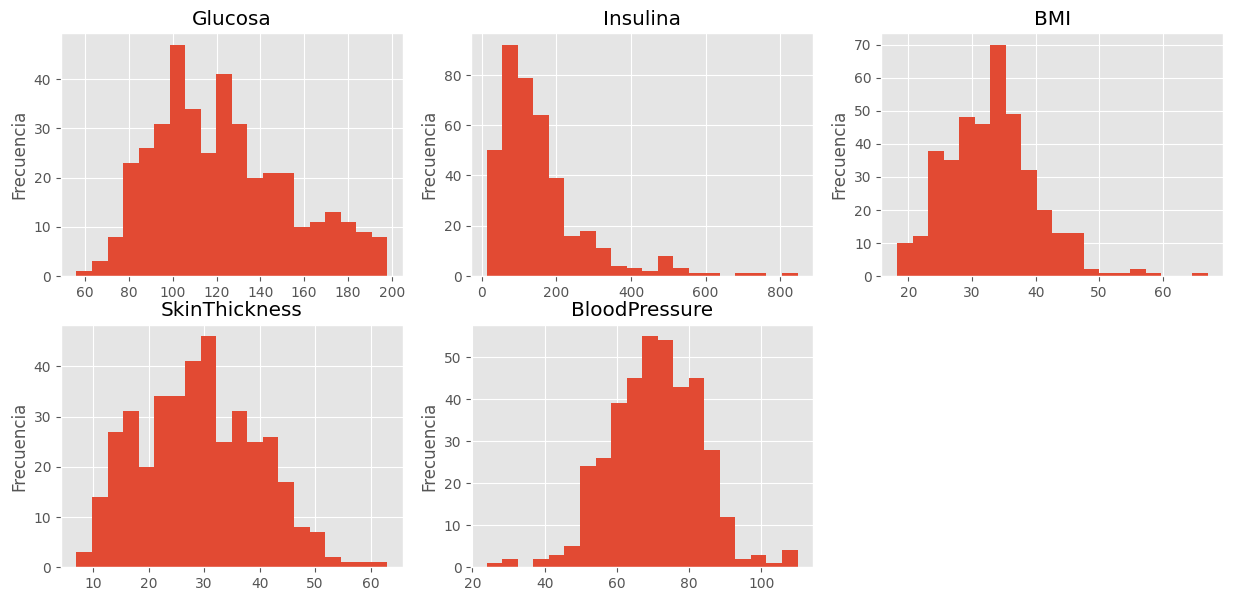

In [ ]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1)
plt.subplot(2,3,1)
df_nan['Glucose'].plot(kind='hist', bins=20, title='Glucosa', ylabel='Frecuencia')
plt.subplot(2,3,2)
df_nan['Insulin'].plot(kind='hist', bins=20, title='Insulina', ylabel='Frecuencia')
plt.subplot(2,3,3)
df_nan['BMI'].plot(kind='hist', bins=20, title='BMI', ylabel='Frecuencia')
plt.subplot(2,3,4)
df_nan['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness', ylabel='Frecuencia')
plt.subplot(2,3,5)
df_nan['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure', ylabel='Frecuencia')

Glucose, BMI y BloodPressure presentan una distribución relativamente simétrica, consistente con los resulatados de los coeficientes de variación. Se aprecian valores de insulina muy elevados, que no se condicen en principio con valores fisiológicos (se intentará buscar más información)

## Graficos con matplotlib univariados del sub-dataset df_diabéticos.

<Axes: title={'center': 'BloodPressure'}, ylabel='Frecuencia'>

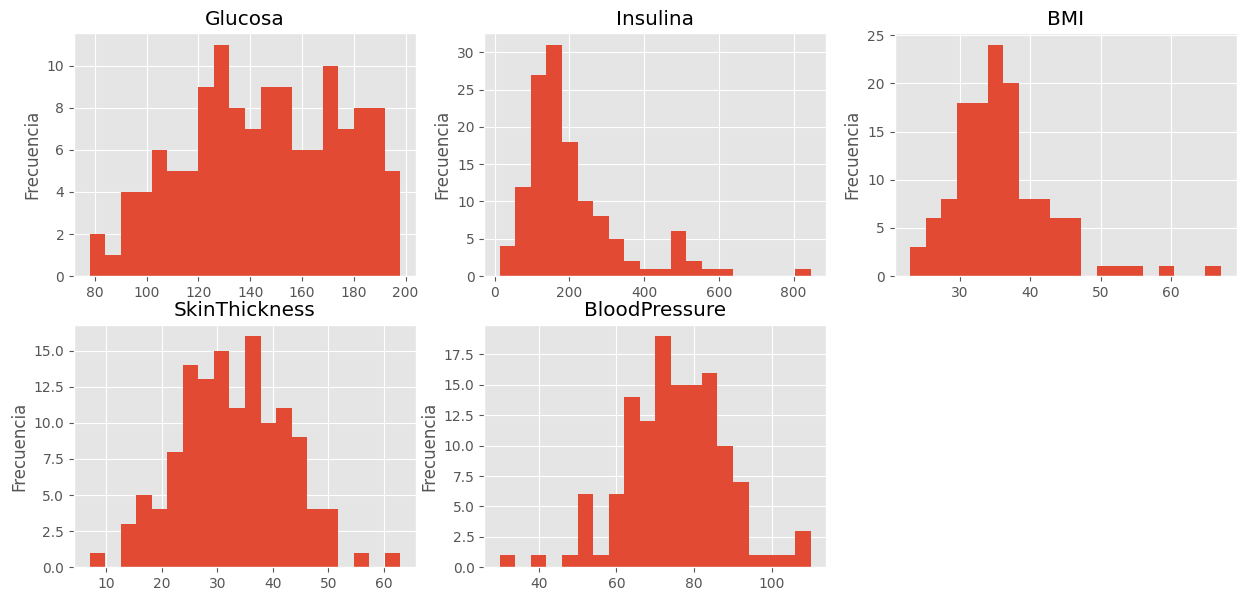

In [ ]:
plt.figure(figsize=(15,6)) #realizo los mismos plots pero solo para los diabeticos, con el fin de ver tendencias y corrimientos.
plt.subplots_adjust(top=1)
plt.subplot(2,3,1)
df_diabeticos['Glucose'].plot(kind='hist', bins=20, title='Glucosa', ylabel='Frecuencia')
plt.subplot(2,3,2)
df_diabeticos['Insulin'].plot(kind='hist', bins=20, title='Insulina', ylabel='Frecuencia')
plt.subplot(2,3,3)
df_diabeticos['BMI'].plot(kind='hist', bins=20, title='BMI', ylabel='Frecuencia')
plt.subplot(2,3,4)
df_diabeticos['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness', ylabel='Frecuencia')
plt.subplot(2,3,5)
df_diabeticos['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure', ylabel='Frecuencia')

Se aprecia un corrimiento de las distribuciones hacia valores más altos, en glucosa,insulina y skinthickness principalmente.

## Análisis de correlación dataset total

<Axes: >

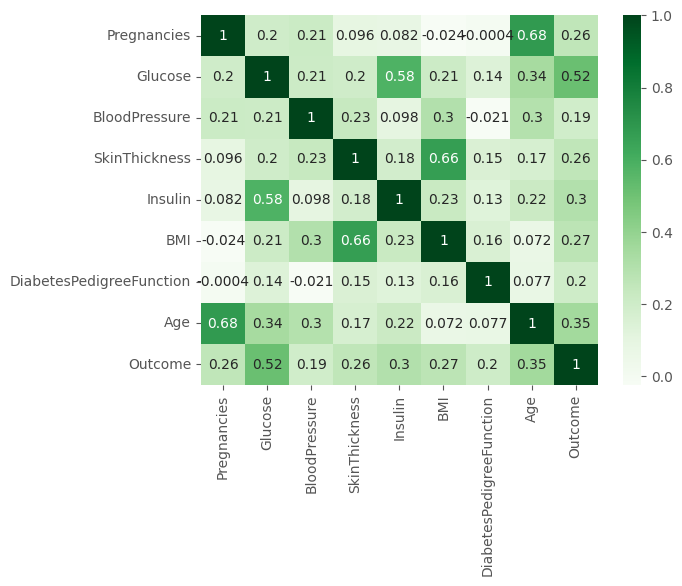

In [ ]:
matrix = df_nan.corr() #total

sns.heatmap(matrix, cmap="Greens", annot=True)

Se observan en general correlaciones débiles entre las variables. Hay correlación positiva moderada entre Glucose y Outcome, Glucose e Insulin, BMI y SkinThickness. Correlación positiva más fuerte entre cantidad de Pregnancies y Age. No se observa una relación marcada entre la funcion DiabetesPedigree y el Outcome.

## Visualización de datos multivariados

Text(0, 0.5, 'Insulina (uU/ml)')

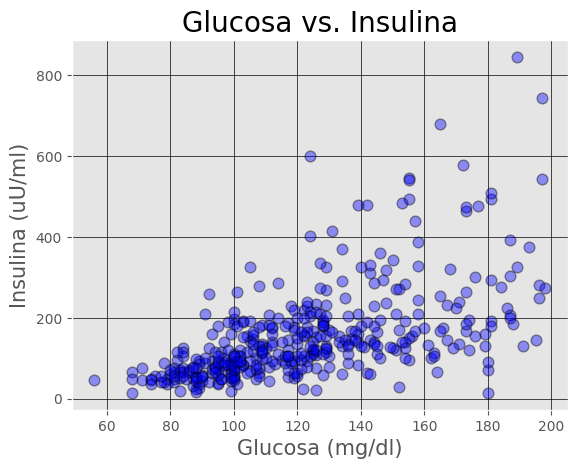

In [ ]:
fig, ax = plt.subplots()
ax.grid(color="k",linestyle="-", linewidth=0.5)
ax.scatter(df_nan["Glucose"], df_nan["Insulin"], alpha=0.4, facecolor="blue", linewidths=1, s=60, edgecolor="k")
ax.set_title('Glucosa vs. Insulina', fontsize=20)
ax.set_xlabel('Glucosa (mg/dl)', fontsize=15)
ax.set_ylabel('Insulina (uU/ml)', fontsize=15)


Text(0, 0.5, 'BMI')

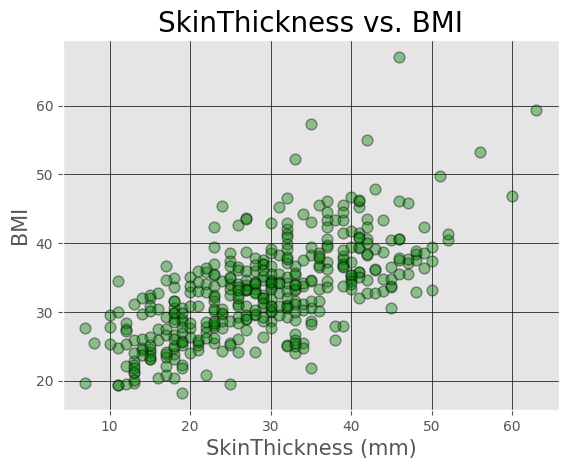

In [ ]:
fig, ax = plt.subplots()
ax.grid(color="k",linestyle="-", linewidth=0.5)
ax.scatter(df_nan["SkinThickness"], df_nan["BMI"], alpha=0.4, facecolor="green", linewidths=1, s=60, edgecolor="k")
ax.set_title('SkinThickness vs. BMI', fontsize=20)
ax.set_xlabel('SkinThickness (mm)', fontsize=15)
ax.set_ylabel('BMI', fontsize=15)

## De acuerdo al "Outcome" realizaré un recuento para un gráfico de barras utilizandolo como variable categórica:

Outcome
0    264
1    130
Name: count, dtype: int64

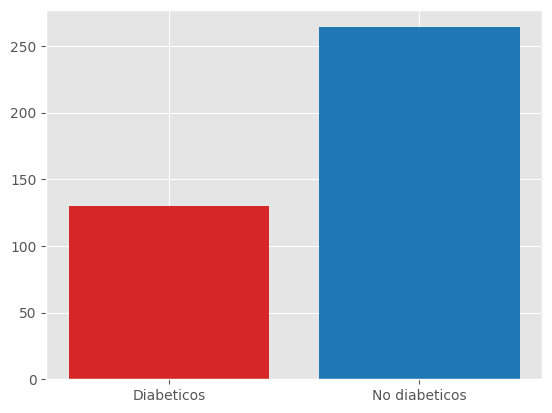

In [ ]:
df_nan["Pregnancies"]=df_nan["Pregnancies"].astype('category') #redefino los tipos de Pregnancies y Outcome como categóricas.
df_nan.Outcome=df_nan.Outcome.astype('category')

fig, ax = plt.subplots()
counts = [df_nan['Outcome'].value_counts()[1], df_nan["Outcome"].value_counts()[0]]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']
ax.bar(["Diabeticos","No diabeticos"], counts, label=bar_labels, color=bar_colors)
df_nan['Outcome'].value_counts()


In [ ]:
df_nan.describe(include='category')

,Pregnancies,Outcome
count,394,394
unique,17,2
top,1,0
freq,94,264


## Realizo los mismos histogramas de Glucosa e Insulina pero utilizando seaborn

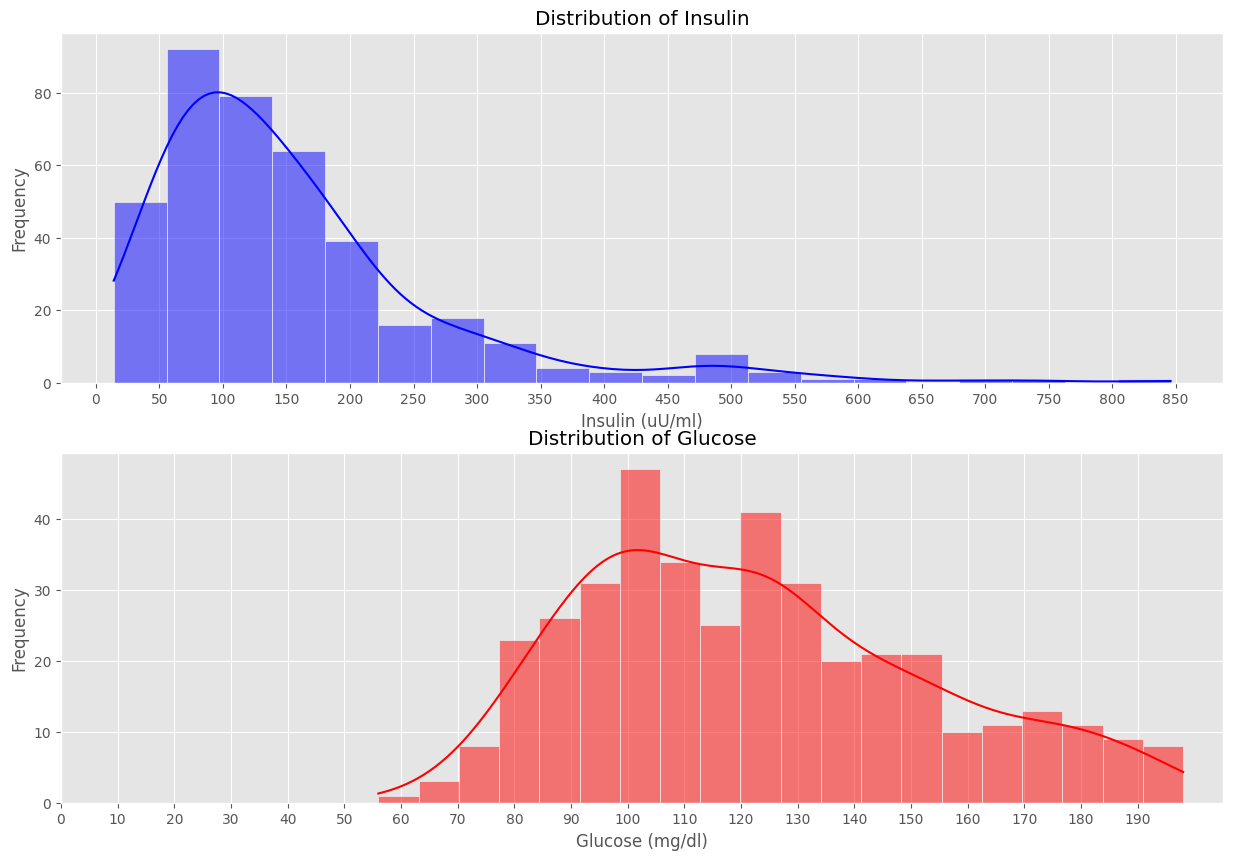

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.histplot(data=df_nan, x="Insulin", bins=20, kde=True, color="blue", ax=ax[0])
ax[0].set_title("Distribution of Insulin")
ax[0].set_xlabel("Insulin (uU/ml)")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks(np.arange(0, 900, 50))
sns.histplot(data=df_nan, x="Glucose", bins=20, kde=True, color="red", ax=ax[1])
ax[1].set_title("Distribution of Glucose")
ax[1].set_xlabel("Glucose (mg/dl)")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks(np.arange(0, 200, 10))
#'DiabetesPedigreeFunction'
plt.show()


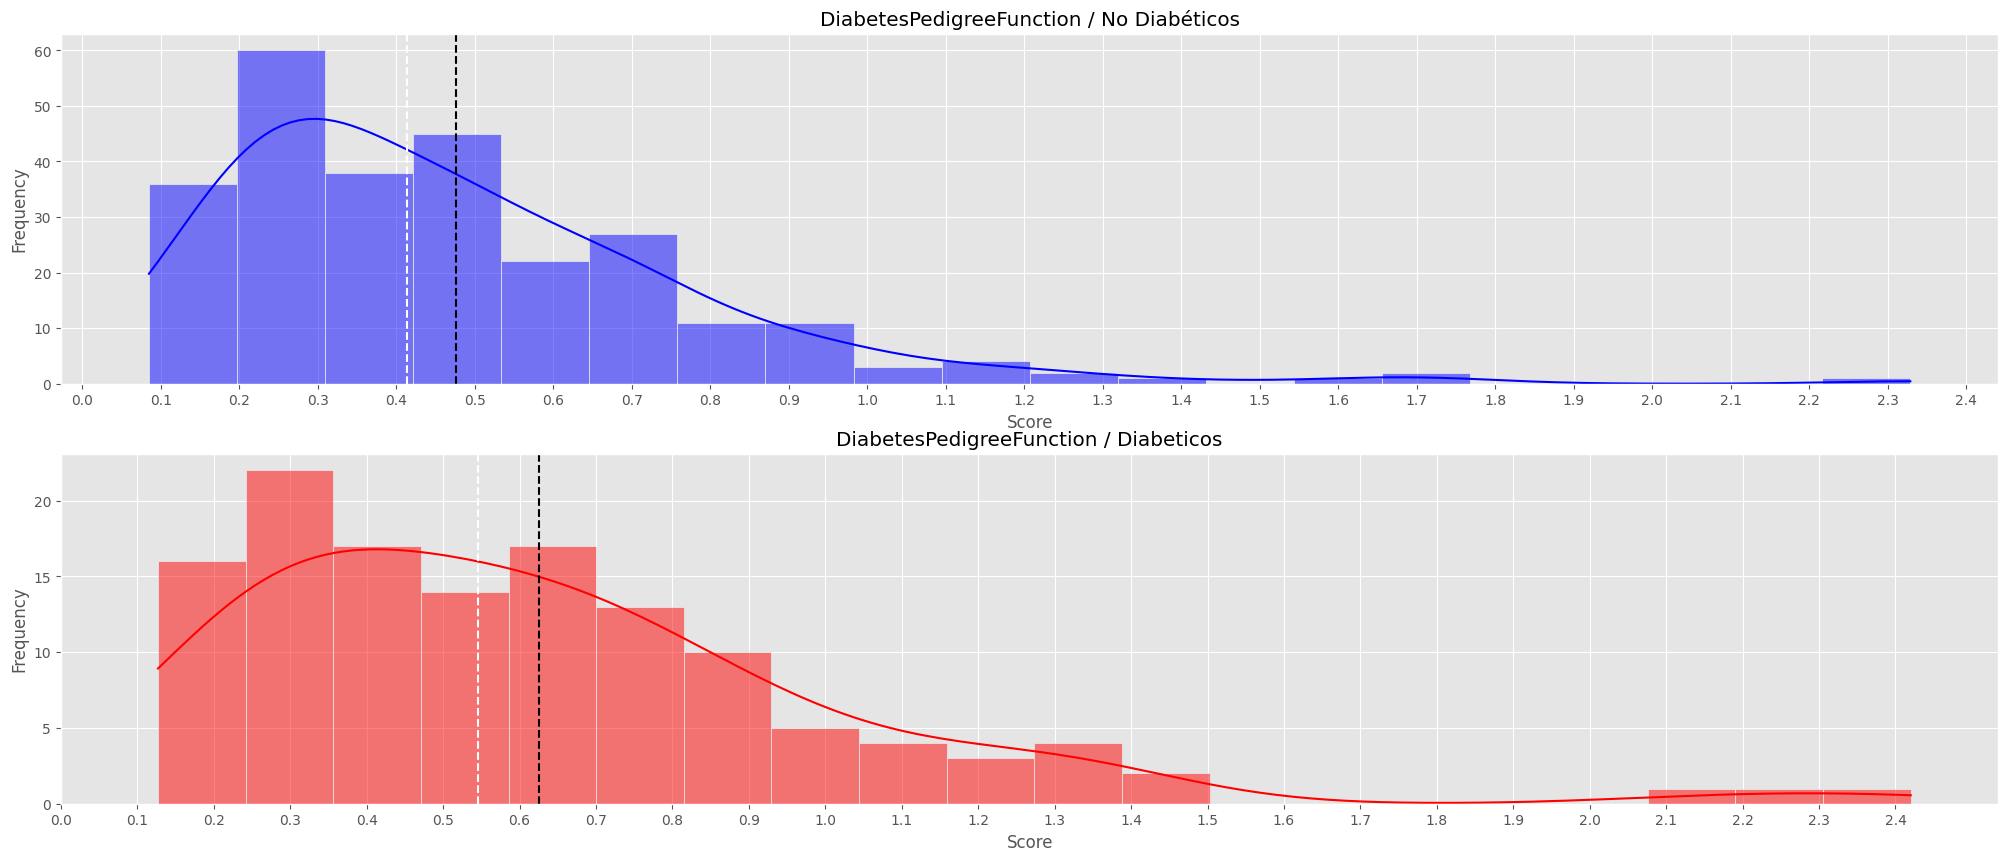

In [ ]:
df_no_diabeticos= df_nan[df_nan["Outcome"] == 0] #separo los pacientes no diabeticos
fig, ax = plt.subplots(2, 1, figsize=(25, 10))
sns.histplot(data=df_no_diabeticos, x="DiabetesPedigreeFunction", bins=20, kde=True, color="blue", ax=ax[0])
ax[0].set_title("DiabetesPedigreeFunction / No Diabéticos")
ax[0].set_xlabel("Score")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks(np.arange(0, 2.5, 0.1))
ax[0].axvline(df_no_diabeticos["DiabetesPedigreeFunction"].mean(), color="black", linestyle="--", label="Media")
ax[0].axvline(df_no_diabeticos["DiabetesPedigreeFunction"].median(), color="white", linestyle="--", label="Mediana")
sns.histplot(data=df_diabeticos, x="DiabetesPedigreeFunction", bins=20, kde=True, color="red", ax=ax[1])
ax[1].set_title("DiabetesPedigreeFunction / Diabeticos")
ax[1].set_xlabel("Score")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks(np.arange(0, 2.5, 0.1))
ax[1].axvline(df_diabeticos["DiabetesPedigreeFunction"].mean(), color="black", linestyle="--", label="Media")
ax[1].axvline(df_diabeticos["DiabetesPedigreeFunction"].median(), color="white", linestyle="--", label="Mediana")
plt.show()

## Diagrama de caja y bigotes para detectar outliers

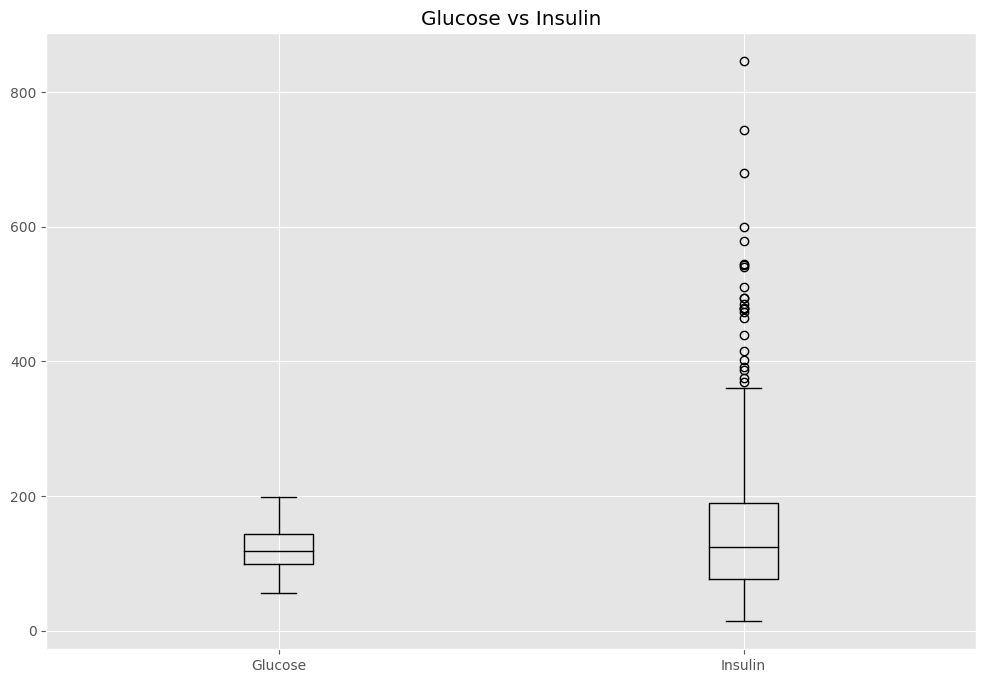

In [ ]:
df_nan[['Glucose', 'Insulin']].plot(kind='box', color="k", title='Glucose vs Insulin', figsize=(12, 8))
plt.gca().spines[['top', 'right',]].set_visible(True)


## Insights preliminares de esta primera entrega



Estructura, el dataset tiene originalmente muchos valores en 0 que son físicamente incorrectos en las variables, Glucose, BloodPressure, SkinThickness, Insulin y BMI. Se procedió a reemplazarlos por NaN para su posterior tratamiento. Se calcularon coeficientes de variación, los valores con datos faltantes, Glucose, BMI y BloodPressure presentaron una distribución simétrica. Se utilizó entonces como estrategia, reemplazarlos por su media, ya que están muy por debajo del 15% de los datos totales. En cuanto a los valores de Insulin y SkinThickness, son variables de interés por lo cual en esta instancia es preferible descartar sus NaN para no distorsionar el análisis.

Se puede apreciar observando los gráficos univariados de no diabéticos (según su Outcome) y diabéticos, que las distribuciones se corren hacia valores más altos en estos últimos, principalmente en glucosa, insulina y grosor de la piel.

Se observan en general correlaciones débiles entre las variables. Hay correlación positiva moderada entre Glucose y Outcome, Glucose e Insulin, BMI y SkinThickness. Correlación positiva más fuerte entre cantidad de Pregnancies y Age. No se observa una relación marcada entre la funcion DiabetesPedigree y el Outcome.

Se grafican a modo de ejemplo de gráfico multivariado, glucosa vs insulina y SkinThickness vs BMI. Se utiliza Matplotlib y luego Seaborn. En cuanto al estudio de la función de pedigree de diabetes (DPF), para su tratamiento se separó la muestra en diabéticos y no diabéticos, siendo en el primer grupo su media mayor a la del segundo, lo cual sugiere su utilidad en el estudio de la enfermedad. También se realizó un diagrama de caja para ver outliers. Los outliers de insulina, si las unidades son como indica el paper del estudio en microU / ml, presenta valores demasiado elevados. Se intentará buscar más información sobre ellos.